In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [ ]:

df = pd.read_csv('/content/flipkart_mobiles final list.csv')


In [ ]:
df=df.drop("Product Name",axis=1)
df=df.drop("Product Link",axis=1)
df=df.drop("Discount",axis=1)

In [ ]:
print(df)

     Price  Rating  Battery    Ram     Rom
0     5749     4.3     5000  2.000   32.00
1     5749     4.3     5000  2.000   32.00
2     8999     4.4     5000  3.000   32.00
3     8999     4.4     5000  3.000   32.00
4     9999     4.4     5000  4.000   64.00
..     ...     ...      ...    ...     ...
691  17370     4.1     5000  4.000  128.00
692  13840     4.1     5000  6.000  128.00
693  13480     4.1     5000  6.000  128.00
694   1699     4.0      800  0.003    0.03
695   1460     4.2     1000  0.003    0.03

[696 rows x 5 columns]


In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [ ]:

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)


print("Mean Squared Error:", mse)

print(model.score(X_test,y_test))

Mean Squared Error: 16351913.53459602
0.8591321705015629


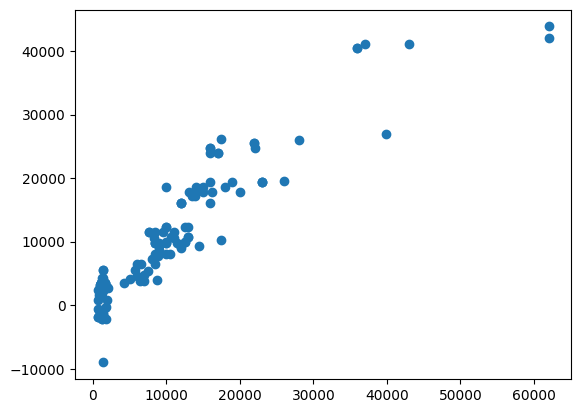

In [ ]:
y_pred = model.predict(X_test)

plt.plot(y_test,model.predict(X_test),"o")

In [ ]:

new_data = pd.DataFrame({'Rating': [4],
                         'Battery': [3000],
                         'Ram':[3],
                         "Rom":[32]

                        })


predicted_price = model.predict(new_data)


print("Predicted Price:", predicted_price)


Predicted Price: [9196.96523744]


In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
import csv
from google.colab import files


def load_data():
    uploaded = files.upload()
    filename = next(iter(uploaded))
    data = []
    with open(filename, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(row)
    return data

def preprocess_data(data):
    for row in data:
        for key in row:
            row[key] = float(row[key])
    return data

def mean(values):
    return sum(values) / len(values)


def variance(values, mean):
    return sum([(x - mean) ** 2 for x in values])


def covariance(x, mean_x, y, mean_y):
    return sum([(x[i] - mean_x) * (y[i] - mean_y) for i in range(len(x))])


def calculate_coefficients(x1, x2, x3, x4, y):
    mean_x1, mean_x2, mean_x3, mean_x4, mean_y = mean(x1), mean(x2), mean(x3), mean(x4), mean(y)
    b1 = covariance(x1, mean_x1, y, mean_y) / variance(x1, mean_x1)
    b2 = covariance(x2, mean_x2, y, mean_y) / variance(x2, mean_x2)
    b3 = covariance(x3, mean_x3, y, mean_y) / variance(x3, mean_x3)
    b4 = covariance(x4, mean_x4, y, mean_y) / variance(x4, mean_x4)
    b0 = mean_y - b1 * mean_x1 - b2 * mean_x2 - b3 * mean_x3 - b4 * mean_x4
    return b0, b1, b2, b3, b4


def predict_price(b0, b1, b2, b3, b4, rating, battery, ram, rom):
    return b0 + b1 * rating + b2 * battery + b3 * ram + b4 * rom

def main():
    data = load_data()
    data = preprocess_data(data)

    rating = [row['Rating'] for row in data]
    battery = [row['Battery'] for row in data]
    ram = [row['Ram'] for row in data]
    rom = [row['Rom'] for row in data]
    price = [row['Price'] for row in data]

    b0, b1, b2, b3, b4 = calculate_coefficients(rating,battery,ram,rom,price)

    rating_val = 4.5
    battery_val = 4000
    ram_val = 4
    rom_val = 64
    predicted_price = predict_price(b0, b1, b2, b3, b4, rating_val, battery_val, ram_val, rom_val)
    print("Predicted price for a mobile phone with the following parameters:")
    print(f"Rating: {rating_val}")
    print(f"Battery: {battery_val} mAh")
    print(f"RAM: {ram_val} GB")
    print(f"ROM: {rom_val} GB")
    print(f"Predicted Price: ${predicted_price:.2f}")

if __name__ == '__main__':
    main()


Saving flipkart_mobiles final list.csv to flipkart_mobiles final list.csv
Predicted price for a mobile phone with the following parameters:
Rating: 4.5
Battery: 4000 mAh
RAM: 4 GB
ROM: 64 GB
Predicted Price: $22051.26
